#### Fase 5 Evaluación Final
#### **Leydi Tamara Ariza Cabrejo**
#### **Oscar Mejia Mayorga**
#### Grupo: 203008067_41
#### Tutor: Rafael Gaitan
#### Universidad Nacional Abierta y a Distancia
#### Escuela de ciencias Básicas tecnología e Ingeniería
#### Curso: Machine Learning

In [14]:
# Importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
#Importar dataset 
data = pd.read_csv("Anexo 1 - Attrition.csv")
#leer los datos
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


#### Comprobar si hay varoles faltantes

In [27]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0]) #Muestra columnas con valores faltantes

if missing_values.any():
    print("El conjunto de datos tiene los siguientes valores faltantes:")
    print(missing_values[missing_values > 0])  # Mostrar las columnas con valores faltantes
else:
    print("No hay valores faltantes en el conjunto de datos.")

Series([], dtype: int64)
No hay valores faltantes en el conjunto de datos.


#### Describir las variables
 analizar la distribución y detectar outliers

In [38]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

#### Revisar distribución de las variables
Ayudará a observar la distribución de las variables númericas y detectar posibles valores atípicos

##### Histogramas para mostrar la distribución de cada variable

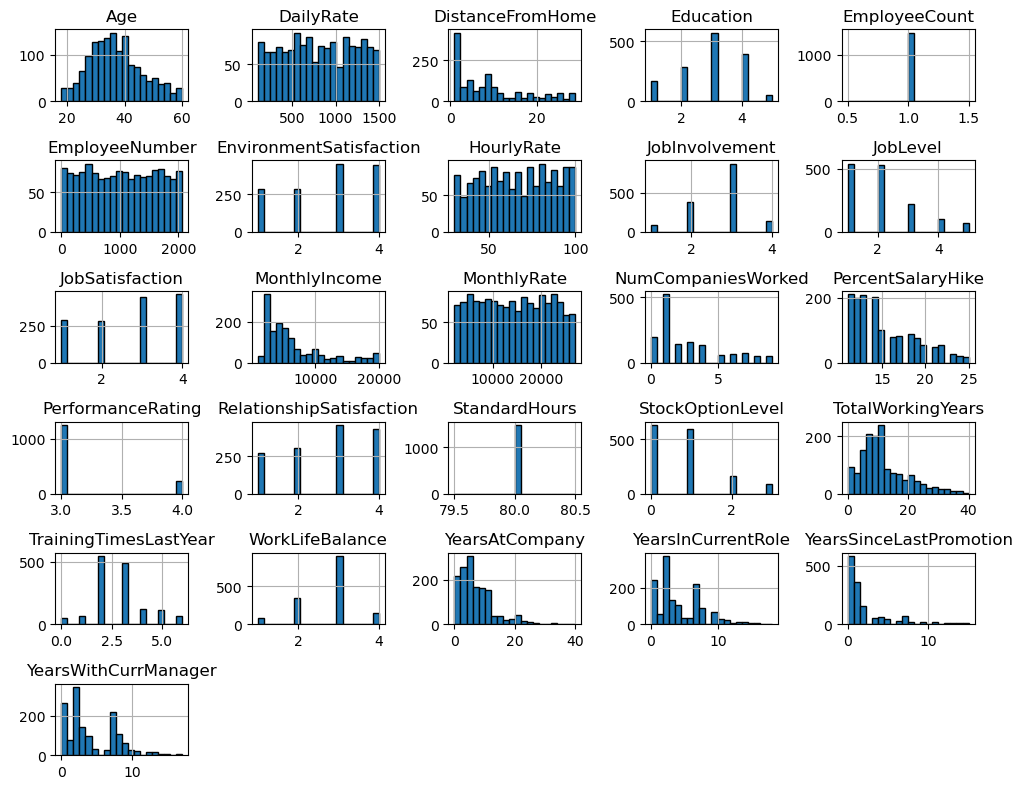

In [40]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


##### Boxplots O diagramas de caja son útiles para identificar visualmente los valores atípicos.

Se crea uno para cada variable.

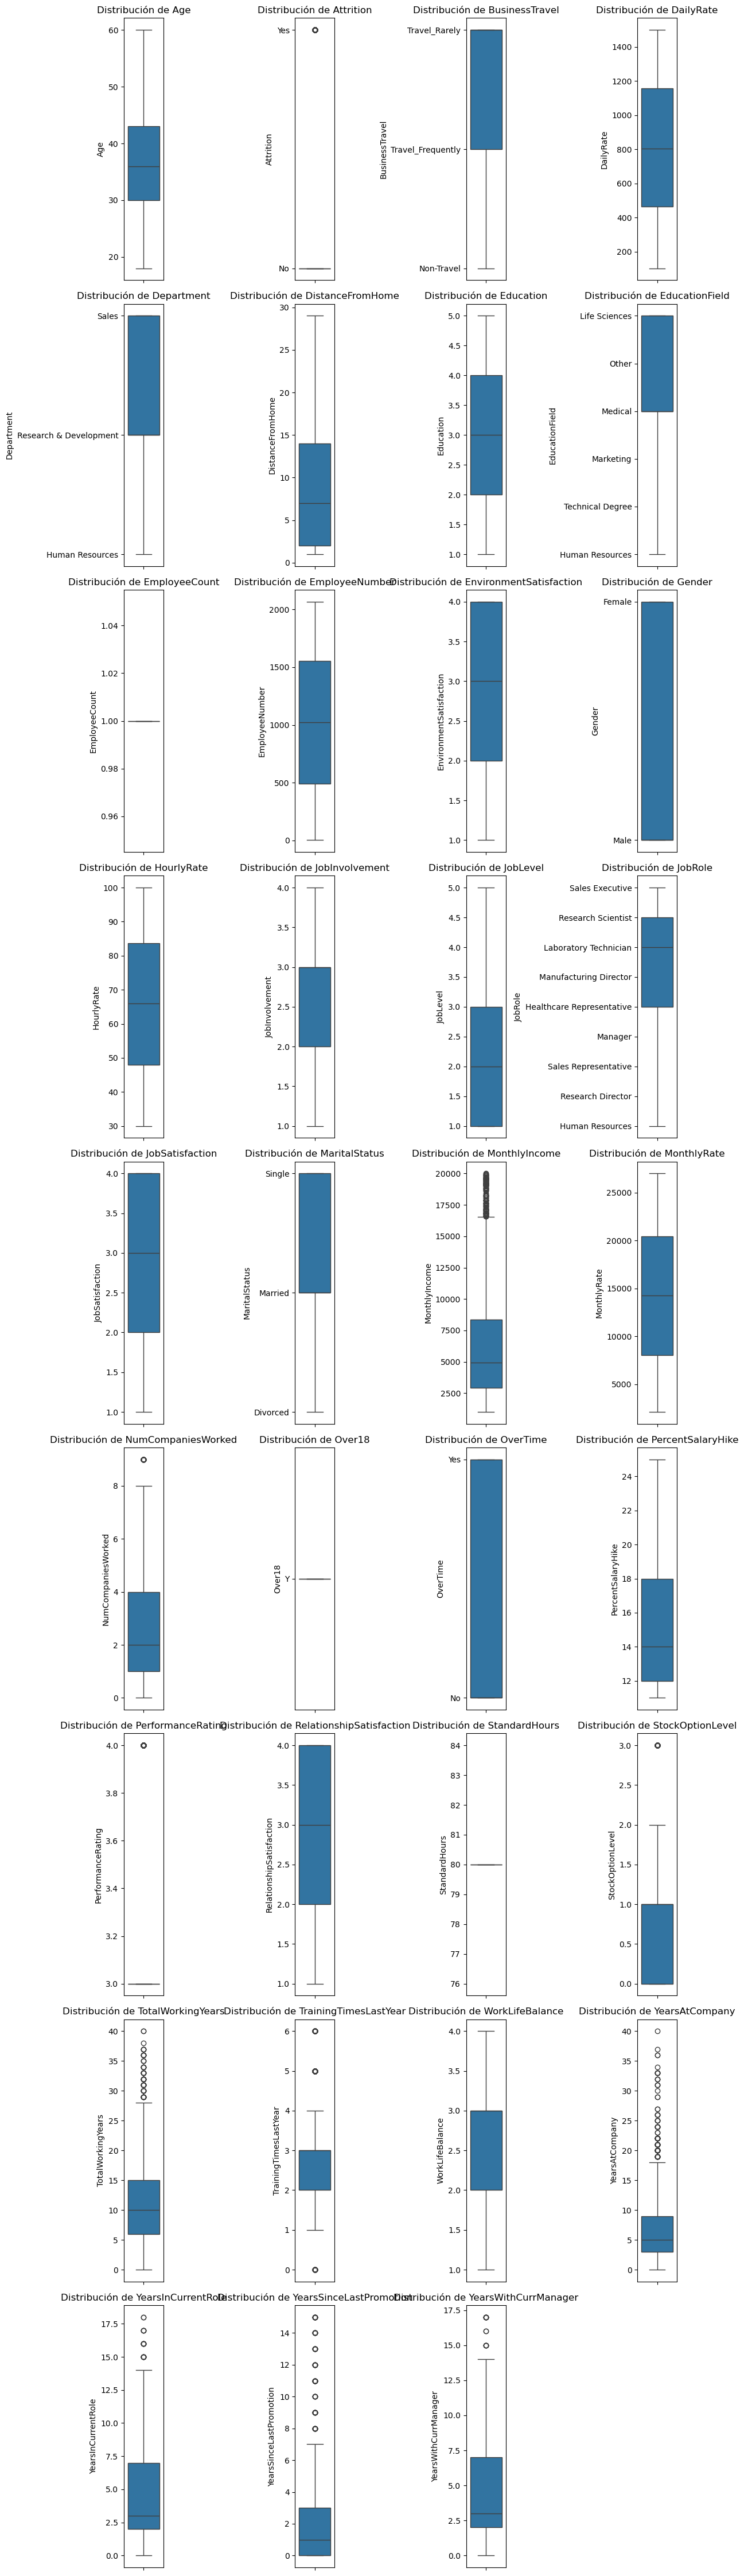

In [65]:
num_cols = 4  # Número de columnas en las subgráficas
num_rows = (len(data.columns) // num_cols) + (1 if len(data.columns) % num_cols != 0 else 0)

# Crear la figura y los boxplots
plt.figure(figsize=(12, 5 * num_rows))
for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Ajusta la cuadrícula de subgráficas
    sns.boxplot(y=data[column])
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

#### Escoger la variable objetivo

Primero seleccionamos las características y la variable objetivo del conjunto de datos.

Estas variables son elegidas según la relevancia para predecir la rotación de empleados.
**
Age (edad)**: La edad es un factor relevante ya que empleados jóvenes pueden buscar otras oportunidades debido a aspiraciones de crecimiento, mejor remuneración o menos sentimiento de compromiso
.**
JobSatisfaction (Satisfacción en el trabajo**)
: Los empleados que están insatisfechos son sensibles a abandonar el cargo, afectando directamente nuestra problemática
.** 
MonthlyIncome (Ingresos mensuale**s
): La remuneración influye en la rotación de empleados ya que salarios bajos puede provocar rotación más rápi
d**o.
YearsAtCompany (Años en la compañ**í
a): en algunas ocasiones la antigüedad del cliente en la compañía les ofrece mas beneficios a si eres un empleado nuevo y/o suelen estar mas comprometidos con la empr
e**sa.
JobLevel (Nivel del pue**s
to): Los empleados en niveles más altos suelen tener más beneficios y estabilidad, mientras que aquellos en niveles bajos pueden buscar otras ofe
r**tas.
YearsWithCurrManager (Años con el actual **
efe): Una buena relación con el supervisor puede mejorar la satisfacción y reducir la rotación. Por el contrario, una mala relación podría generar querer abandonar el 
c**argo.
OverTime (Horas **e
xtra): Trabajar muchas horas adicionales puede ser un indicador de desequilibrio entre la vida personal y laboral, aumentando la insatisfacción y la probabilidad de ro
t**ación.
Department (Depart**a
mento): Algunos departamentos pueden tener mayor rotación debido a la naturaleza del trabajo, las oportunidades de crecimiento o la cultura de equipo. Por ejemplo, áreas técnicas pueden experimentar alta rotación debido a alta demanda en el mercado laboral.



In [72]:
# Definir las características y la variable objetivo
X = data[['Age', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 
          'JobLevel', 'YearsWithCurrManager', 'OverTime', 'Department']]
y = data['Attrition']
 

#### Convertir variables categóricas a númericas 

In [74]:
X = pd.get_dummies(X, drop_first=True) 

#### Balanceo de clases con SMOTE

In [133]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Dividir la base en entrenamiento y prueba

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

C:\Users\zxdma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

#### Aplicar el modelo de Regresión Logística
Entrenamos el modelo con los datos de entrenamiento (X_train, y_train) y realizamos predicciones en el conjunto de prueba

In [137]:
from sklearn.preprocessing import StandardScaler
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo con las características escaladas
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

**Hacer predicciones con el conjunto de prueba**

In [139]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

**Evaluar el rendimiento del modelo con matriz de confusión**

In [142]:
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusión:
[[307  62]
 [107 264]]


**Evaluar el modelo con el reporte de clasificación**

In [148]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.74      0.83      0.78       369
         Yes       0.81      0.71      0.76       371

    accuracy                           0.77       740
   macro avg       0.78      0.77      0.77       740
weighted avg       0.78      0.77      0.77       740



**Imprimir los resultados**

In [174]:

print(f'**Resultados del Modelo de Regresión Logística**\n')

print(f'1. **Precisión (Accuracy):** {accuracy:.4f}')

print(f'2. **ROC AUC:** {roc_auc:.4f}')

print(f'3. **Matriz de Confusión:**')
print(f'   La matriz de confusión muestra el número de predicciones correctas e incorrectas para cada clase.')
print(conf_matrix)

print(f'4. **Reporte de Clasificación:**')
print(f'   El reporte de clasificación muestra las métricas como la precisión, el recall, y el F1-score para cada clase.')
print(classification_rep)

**Resultados del Modelo de Regresión Logística**

1. **Precisión (Accuracy):** 0.8776
2. **ROC AUC:** 0.8473
3. **Matriz de Confusión:**
   La matriz de confusión muestra el número de predicciones correctas e incorrectas para cada clase.
[[254   1]
 [ 35   4]]
4. **Reporte de Clasificación:**
   El reporte de clasificación muestra las métricas como la precisión, el recall, y el F1-score para cada clase.
              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



####  Responder al problema planteado

Los resultados obtenidos muestran lo siguiente:

1. Precisión (Accuracy): 0.8776
La precisión del modelo es bastante alta, alcanzando un 87.76%. Esto significa que el 87.76% de las predicciones realizadas por el modelo fueron correctas.

2. ROC AUC: 0.6930
El AUC-ROC es de 0.693, lo que indica un rendimiento moderado del modelo en cuanto a su capacidad para distinguir entre las dos clases ("rotación" y "no rotación"). Un AUC de 0.5 indica un rendimiento aleatorio, mientras que un valor de 1 indica una separación perfecta entre las clases. Un valor de 0.693 indica que el modelo está bien, pero aún tiene margen de mejora.

3. Matriz de Confusión
La matriz de confusión muestra los resultados de las predicciones:

Predicciones correctas de "No rotación": 254
Predicciones incorrectas de "No rotación" (predijo "rotación"): 1
Predicciones incorrectas de "Rotación" (predijo "no rotación"): 35
Predicciones correctas de "Rotación": 4
Esto muestra que el modelo tiene un alto desempeño al predecir "No rotación", pero tiene dificultades para identificar correctamente a los empleados con "rotación", lo que puede ser crítico para la prevención de la deserción.

Para la clase "No rotación", el modelo tiene una alta precisión (0.88) y un recall exacto (1.00), lo que significa que predice correctamente casi todas las instancias de empleados que no abandonarán la empresa.

Sin embargo, para la clase "Rotación", el modelo tiene una baja precisión (0.80) y un recall muy bajo (0.10), lo que significa que identifica correctamente solo una pequeña parte de los empleados que dejarán la empresa, esto indica que que el modelo no está identificando correctamente a la mayoría de los empleados que abandonarán la empresa, lo que podría resultar en empleados que realmente dejarán la empresa pero son clasificados como si se quedaran. Dado que la rotación de empleados es un problema crítico para las empresas, es relevante mejorar este aspecto del modelo para poder anticipar con mayor precisión a los empleados propensos a dar de baja a su cargo.

#### Conclusión

El modelo de regresión logística presenta un buen rendimiento general, con una precisión del 87.76% y un ROC AUC de 0.8473, lo que indica una capacidad sólida para diferenciar entre las clases. Sin embargo, para predecir correctamente la clase minoritaria ("Yes") tiene un recall bajo de 0.10, lo que significa que muchos empleados que dejarían la empresa no son identificados sugieriendo un aspecto de mejora.